<h1><b>Đồ án thu thập dữ liệu</b></h1>

Thông tin nhóm:

PHẠM PHÚ HOÀNG SƠN – 20120366

HÀ XUÂN TRƯỜNG - 20120391

NGUYỄN HOÀNG VIỆT – 20120402

TRẦN MINH QUANG – 20120559

<h2><b>Mô tả đồ án</b></h2>

Đồ án lần này được thực hiện để nâng cao khả năng thực hiện một quy trình khoa
học dữ liệu. Đồ án tổng hợp lại tất cả kiến thức và kĩ năng đã được học ở môn Lập
trình khoa học dữ liệu giúp cho sinh viên có thể ôn tập và cũng cố kiến thức cũng
như nâng cao khả năng của bản thân.

Tập dữ liệu của đồ án lần này được lấy trên Kaggle gồm có 2 file là 2017-2021.csv và
Tinh.csv

<h2><b>Thu thập dữ liệu</b></h2>

Dữ liệu được thu thập từ ... và nguồn tải về là trên Kaggle. 

Link: https://www.kaggle.com/datasets/phuc16102001/vietnam-highschool-exam-2017-to-2021


Licence: CC0: Public Domain

<b><h2>Khám phá dữ liệu</b></h2>

<b>improt các thư viện</b>


In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
sns.set_style("darkgrid")

</b>Đọc dữ liệu file 2017-2021.csv vào biến `df_scores` bằng pandas.</b>

In [3]:
df_scores = pd.read_csv('../data/2017-2021.csv')
df_scores.head()

,SBD,Toan,Van,Ly,Sinh,Ngoai ngu,Year,Hoa,Lich su,Dia ly,GDCD,MaTinh
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8


</b>Đọc dữ liệu file Tinh.csv vào biến `df_provinces` bằng pandas.</b>

In [4]:
df_provinces = pd.read_csv('../data/Tinh.csv')
df_provinces.head()

,MaTinh,TenTinh
0,1,THÀNH PHỐ HÀ NỘI
1,2,THÀNH PHỐ HỒ CHÍ MINH
2,3,THÀNH PHỐ HẢI PHÒNG
3,4,THÀNH PHỐ ĐÀ NẴNG
4,5,TỈNH HÀ GIANG


<b>Gộp df_scores và df_provinces thành một df_aspirants theo `MaTinh`</b>

In [5]:
df_aspirants = df_scores.merge(df_provinces, how="inner", on="MaTinh")
df_aspirants.head()

,SBD,Toan,Van,Ly,Sinh,Ngoai ngu,Year,Hoa,Lich su,Dia ly,GDCD,MaTinh,TenTinh
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI


 <b>Dữ liệu gồm bao nhiêu dòng và cột, lưu số dòng và số cột vào 2 biến `num_rows` và `num_cols`.</b>

In [6]:
num_rows, num_cols = df_aspirants.shape
print(num_cols)
print(num_rows)

13
4199188


Mỗi dòng ở đây thể hiện cho thông tin của một thí sinh

Các cột có mô tả như sau:
- SBD: Số báo danh của thí sinh
- Toan: Điểm thi môn toán
- Van: Điểm thi môn văn
- Ly: Điểm thi môn lý
- Sinh: Điểm thi môn Sinh
- Ngoai ngu: Điểm thi môn ngoại ngữ
- Year: Năm thi
- Hoa: Điểm thi môn hóa
- Lich su: Điểm thi môn lịch sử
- Dia ly: Điểm thi môn địa lý
- GDCD: Điểm thi môn giáo dục công dân
- MaTinh: Mã tỉnh
- TenTinh: Tên tỉnh

Các dòng và cột đều không có vấn đề, chúng ta tiếp tục khám phá dữ liệu.

<b>Các dòng của dữ liệu có bị lặp không, lưu vào biến `have_duplicated_rows` là `False` nếu không lặp và ngược lại.</b>

In [7]:
have_duplicated_rows = False
if df_aspirants[df_aspirants.duplicated()].empty == True:
    have_duplicated_rows == True
print(have_duplicated_rows)

False


<b>Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?</b>

Lưu giá trị của các kiểu dữ liệu vào biến `col_dtypes`.

In [8]:
col_dtypes = df_aspirants.dtypes
print(col_dtypes)

SBD            int64
Toan         float64
Van          float64
Ly           float64
Sinh         float64
Ngoai ngu    float64
Year           int64
Hoa          float64
Lich su      float64
Dia ly       float64
GDCD         float64
MaTinh         int64
TenTinh       object
dtype: object


<b>Tìm kiếm kiểu dữ liệu thật sự của các cột có dtype là object.</b>

In [9]:
def open_object_dtype(s):
    dtypes = set()
    s.apply(lambda x : dtypes.add(type(x)))
    return dtypes

for i in df_aspirants.columns:
    print(i," ", open_object_dtype(df_aspirants[i]))

SBD   {<class 'int'>}
Toan   {<class 'float'>}
Van   {<class 'float'>}
Ly   {<class 'float'>}
Sinh   {<class 'float'>}
Ngoai ngu   {<class 'float'>}
Year   {<class 'int'>}
Hoa   {<class 'float'>}
Lich su   {<class 'float'>}
Dia ly   {<class 'float'>}
GDCD   {<class 'float'>}
MaTinh   {<class 'int'>}
TenTinh   {<class 'str'>}


Có vẻ các dòng không có gì bất thường. Ta tiếp tục khám phá dữ liệu

<b>Kiểm tra số giá trị null của một cột</b>

In [10]:
df_aspirants.isna().sum()

SBD                0
Toan           38633
Van            92255
Ly           2564225
Sinh         2586825
Ngoai ngu     499929
Year               0
Hoa          2949226
Lich su      2054376
Dia ly       2093149
GDCD         2375559
MaTinh             0
TenTinh            0
dtype: int64

<b><h2>Tiền xử lý dữ liệu</b></h2>

<b>Cột SBD đang có kiểu dữ liệu số, ta chuyển sang chuỗi để tiện cho việc kiểm tra sau này</b>

In [11]:
df_aspirants.SBD = df_aspirants.SBD.astype(str)
df_aspirants.dtypes

SBD           object
Toan         float64
Van          float64
Ly           float64
Sinh         float64
Ngoai ngu    float64
Year           int64
Hoa          float64
Lich su      float64
Dia ly       float64
GDCD         float64
MaTinh         int64
TenTinh       object
dtype: object

<b><h2>Khám phá dữ liệu ( Tiếp tục )</h2></b>

Với các cột có kiểu dữ liệu số, ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Lưu kết quả vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `df_aspirants`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = df_aspirants.select_dtypes(include=numerics)

missing_ratio = (new_df.isna().sum()*100/num_rows).round(1)
missing_ratio = missing_ratio.to_frame().T

df = new_df.describe().round(1)

min = df.iloc[[3]]

lower_quartile = df.iloc[[4]]

median = df.iloc[[5]]

upper_quartile = df.iloc[[6]]

max = df.iloc[[7]]

frames = [missing_ratio, min, lower_quartile, median, upper_quartile, max]
num_col_info_df = pd.concat(frames)
num_col_info_df = num_col_info_df.rename(index={0: 'missing_ratio', '25%': 'lower_quartile', '50%': 'median', '75%':'upper_quartile'})

num_col_info_df

,Toan,Van,Ly,Sinh,Ngoai ngu,Year,Hoa,Lich su,Dia ly,GDCD,MaTinh
missing_ratio,0.9,2.2,61.1,61.6,11.9,0.0,70.2,48.9,49.8,56.6,0.0
min,0.0,0.0,0.0,0.0,0.0,2017.0,0.0,0.0,0.0,0.0,1.0
lower_quartile,4.4,5.0,4.5,4.0,3.2,2018.0,4.5,3.5,5.5,7.0,13.0
median,6.0,6.0,6.0,5.0,4.2,2019.0,6.0,4.2,6.5,8.0,28.0
upper_quartile,7.4,7.0,7.2,5.8,5.8,2020.0,7.2,5.5,7.2,8.8,45.0
max,10.0,10.0,10.0,10.0,10.0,2021.0,10.0,10.0,10.0,10.0,64.0


<b>Các cột có dữ liệu gì bất thường hay không?</b>

In [13]:
for i in df_aspirants.columns:
    print(i, ': ', df_aspirants[i].unique())

SBD :  ['8002816' '8005707' '8004883' ... '13007412' '13007417' '13007418']
Toan :  [ 7.8   3.    6.    2.4   4.2   3.2   4.6   4.    1.4   2.6   1.8   4.8
  3.4   5.8   8.    5.    3.8   3.6   9.2   8.6   2.8   6.2   2.    2.2
  6.4   8.4   8.2    nan  4.4   5.4   5.6   8.8   1.2   6.6   7.6   7.4
  7.2   0.8   5.2   6.8   9.4   1.6   7.    9.    7.75  9.6   1.    9.8
  0.6   0.   10.    0.2   0.4   5.25  2.25  3.5   4.25  6.5   5.5   4.75
  3.75  4.5   8.25  6.25  2.75  7.25  5.75  7.5   6.75  3.25  2.5   8.5
  8.75  9.25  1.5   1.75  9.5   9.75  1.25  0.75  0.5 ]
Van :  [ 8.25  3.25  5.25  3.75  4.    5.75  6.    3.5   6.75  6.25  5.    4.75
  7.5   5.5   4.5   7.25  6.5   3.    1.75  8.    7.75  7.     nan  4.25
  2.75  2.5   2.    8.5   1.5   2.25  8.75  9.    1.25  0.75  0.    0.5
  1.    9.25  9.5   0.25  6.58  6.92  6.08  4.58  5.58  6.33  5.92  3.17
  5.67  4.67  4.17  3.67  4.42  7.16  6.83  3.42  5.42  6.17  6.67  7.33
  7.08  5.08  5.17  5.83  7.17  2.67  4.08  2.92  3.92  

Có sự bất thường ở các cột điểm:
- Môn toán, Ngoại ngữ: Điểm được lấy đến 0.2
- Các môn còn lại: Điểm được lấy đến 0.25

Với những ô có dữ liệu không thích hợp ta sẽ làm tròn nó về dữ liệu dạng đúng gần nhất

Làm tròn đối với môn Toan, Ngoai ngu:
- .0 - .10 => .0
- .11 - .30 => .2
- .31 - .50 => .4
- .51 - .70 => .6
- .71 - 90 => .8
- .91 - .99 => 1.0

Làm tròn đối với môn còn lại:
- .0 đến .15 => .0
- .16 đến .35 => .25
- .36 đến .65 => .5
- .66 đến.85 => .75
- .86 đến .99 => 1.0

<b><h2>Tiền xử lý dữ liệu (tiếp tục)</b></h2>

<b>Thay đổi dữ liệu cho thích hợp ở các cột Toan, Ngoai ngu, Tieng anh</b>

In [14]:
def correct_data_1(x): #Hàm thay đổi các giá trị không hợp lệ trong cột Toan, Ngoai ngu
    if pd.isnull(x):
        return np.nan
    frac, whole = math.modf(x)
    if frac <= 0.1:
        return whole
    elif frac >= 0.1 and frac <= 0.3:
        return whole + 0.2
    elif frac >= 0.3 and frac <= 0.5:
        return whole + 0.4
    elif frac >= 0.5 and frac <= 0.7:
        return whole + 0.6
    elif frac >= 0.7 and frac <= 0.9:
        return whole + 0.8
    elif frac >= 0.9 and frac <= 1.0:
        return whole + 1
    else:
        return x

df_aspirants['Toan'] = df_aspirants['Toan'].apply(lambda x: correct_data_1(x))

df_aspirants['Ngoai ngu'] = df_aspirants['Ngoai ngu'].apply(lambda x: correct_data_1(x))

In [15]:
def correct_data_2(x): #Hàm thay đổi các giá trị không hợp lệ trong cột Van
    if pd.isnull(x):
        return np.nan
    frac, whole = math.modf(x)
    if frac <= 0.15:
        return whole
    elif frac >= 0.15 and frac <= 0.35:
        return whole + 0.25
    elif frac >= 0.35 and frac <= 0.65:
        return whole + 0.5
    elif frac >= 0.65 and frac <= 0.85:
        return whole + 0.75
    elif frac >= 0.85 and frac <= 1.0:
        return whole + 1
    else:
        return x
for i in df_aspirants.columns:
    if i != 'Toan' and i != 'Ngoai ngu' and i != 'SBD' and i != 'MaTinh'and i != 'TenTinh'and i != 'Year':
        df_aspirants[i] = df_aspirants[i].apply(lambda x: correct_data_2(x))

<b><h2>Khám phá dữ liệu ( Tiếp tục )</h2></b>

<b>Xem sự phân bố dữ liệu dưới dạng biểu đồ</b>

In [16]:
def draw_chart(df, subject):
    plt.figure(figsize=(20, 8))
    sns.countplot(x = df[subject])
    plt.xticks(rotation=45)
    plt.show()

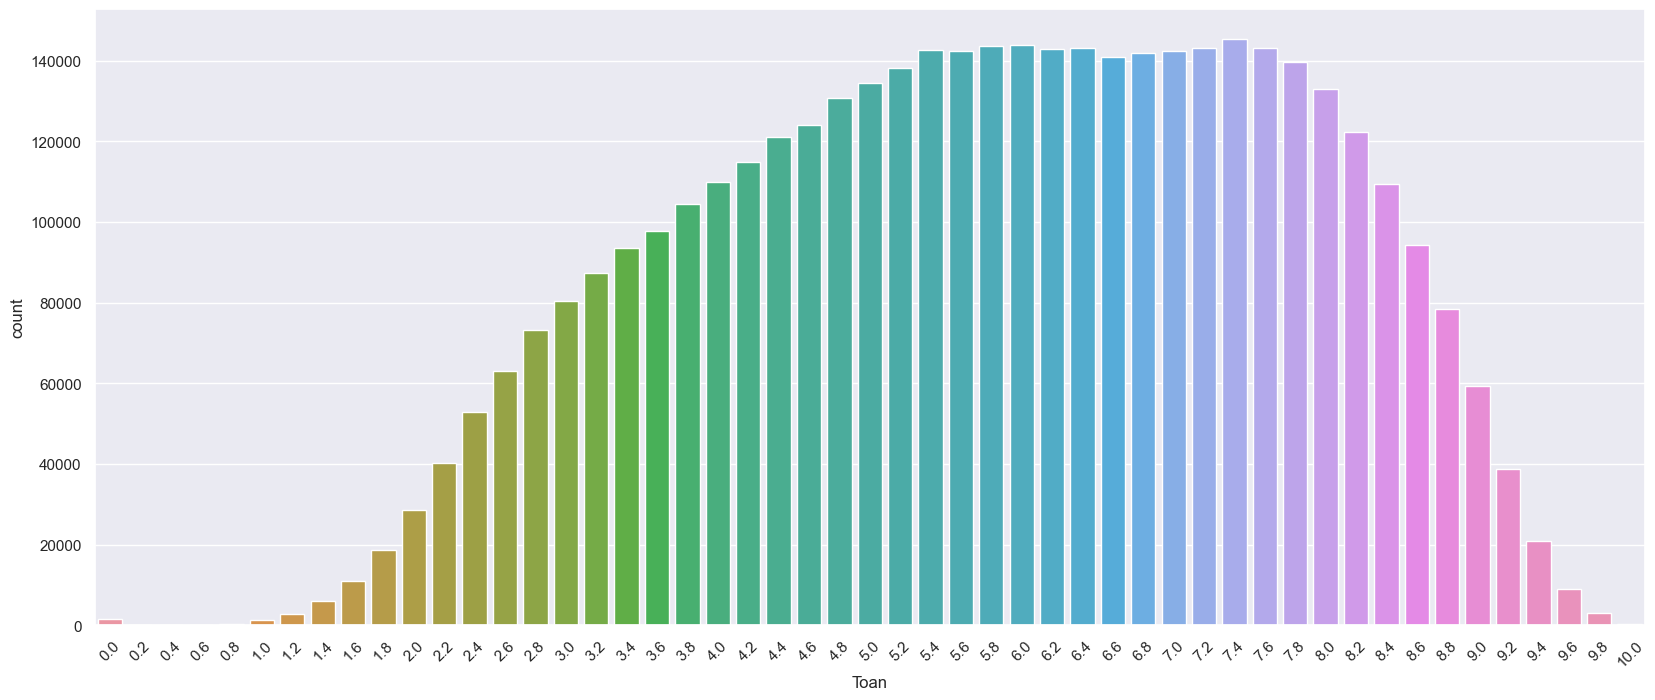

In [17]:
draw_chart(df_aspirants, 'Toan')

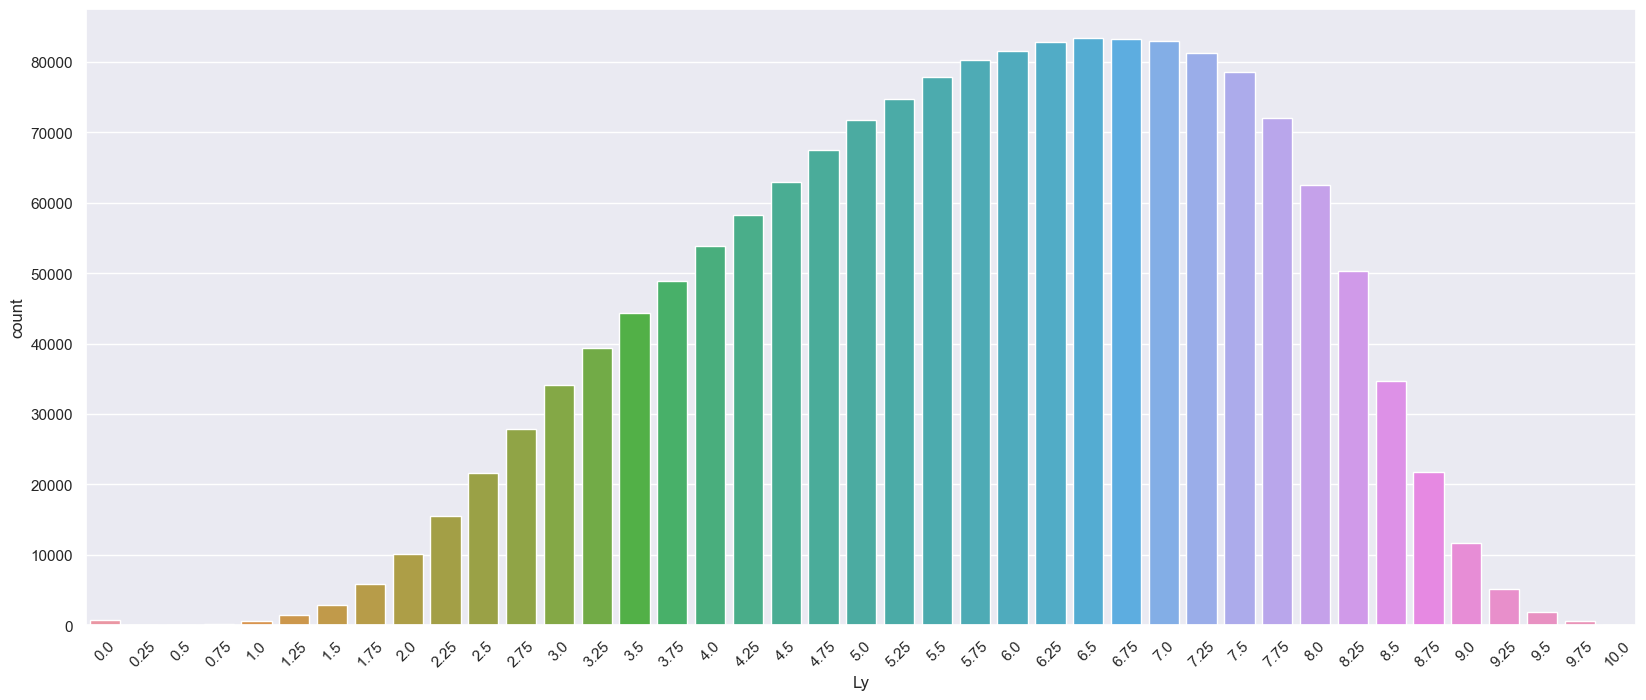

In [18]:
draw_chart(df_aspirants, 'Ly')

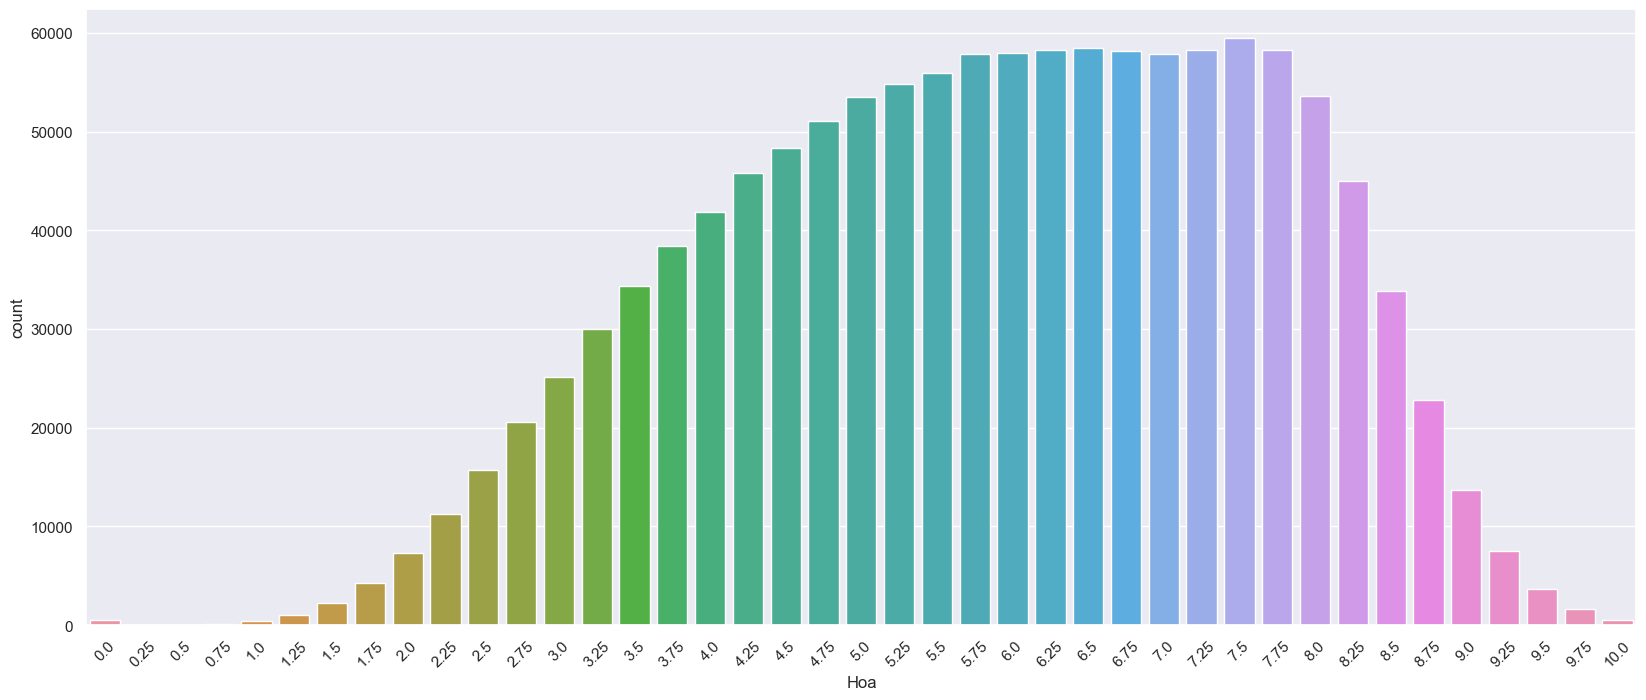

In [19]:
draw_chart(df_aspirants, 'Hoa')

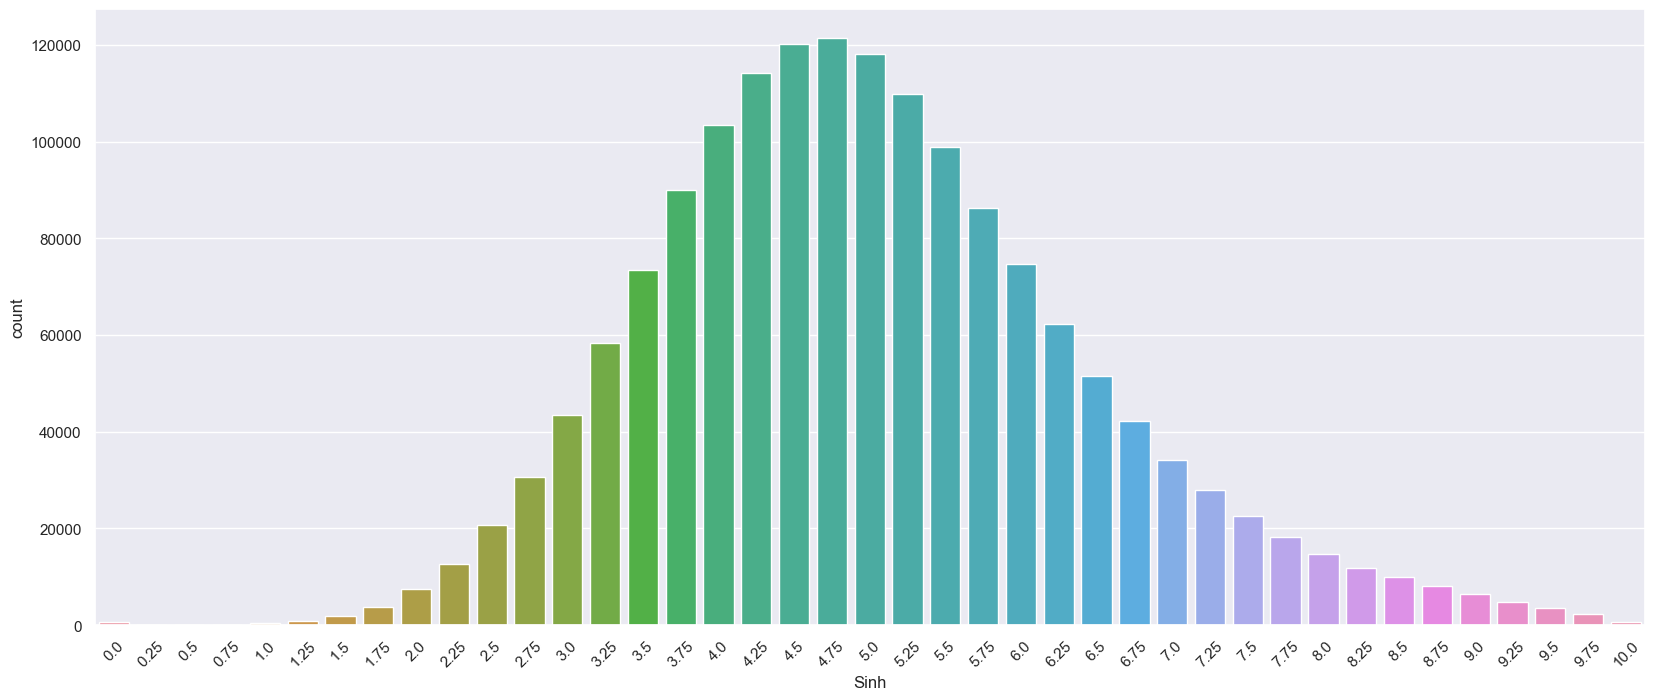

In [20]:
draw_chart(df_aspirants, 'Sinh')

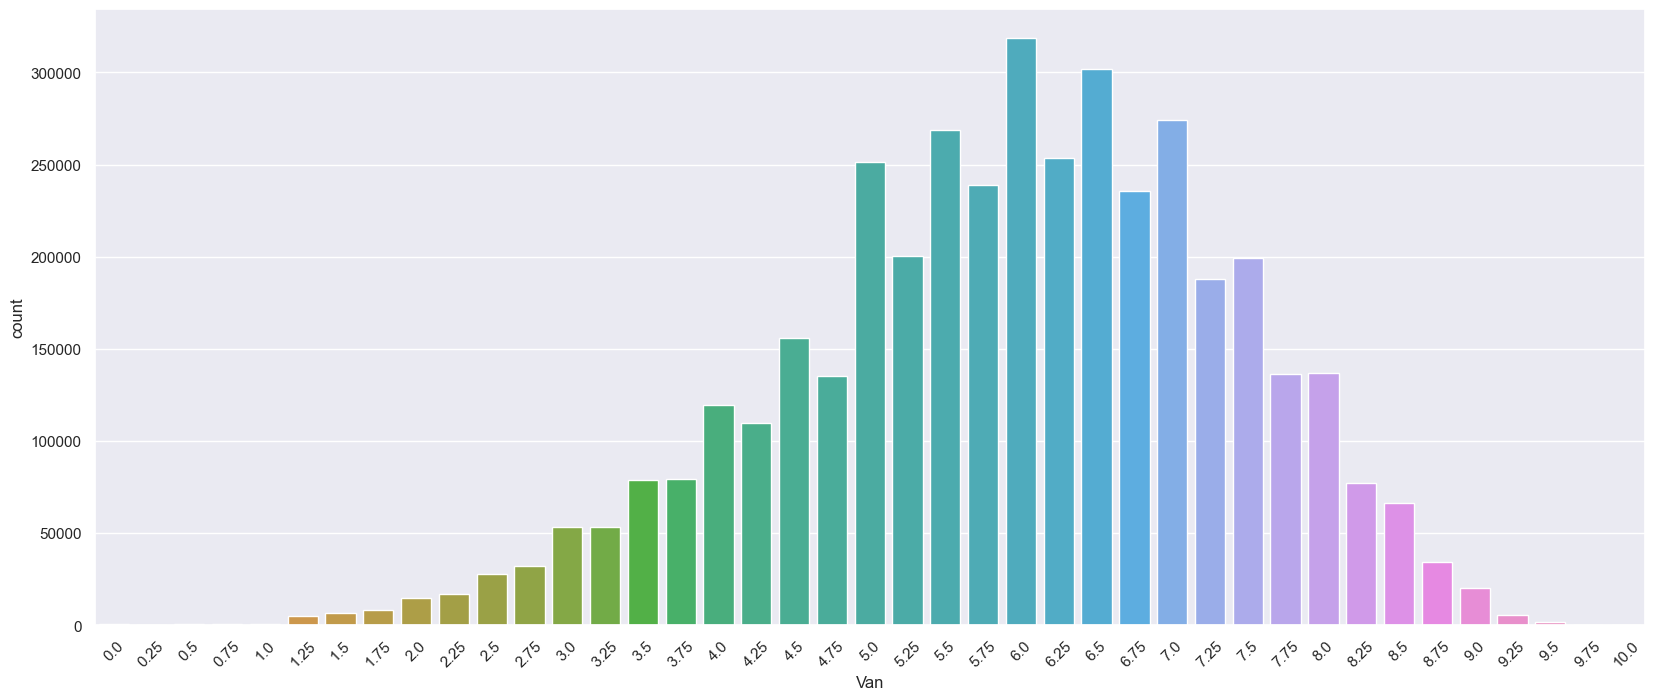

In [21]:
draw_chart(df_aspirants, 'Van')

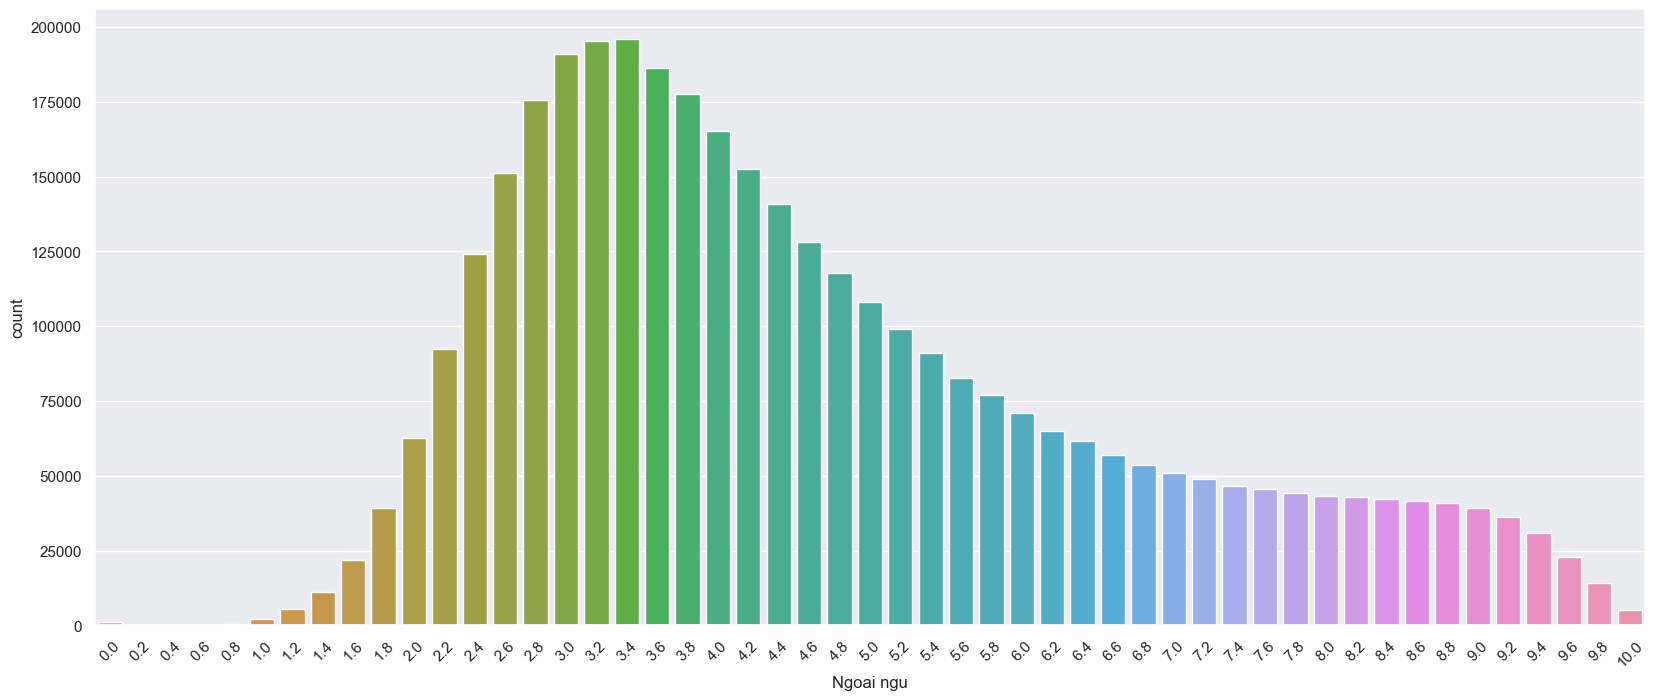

In [22]:
draw_chart(df_aspirants, 'Ngoai ngu')

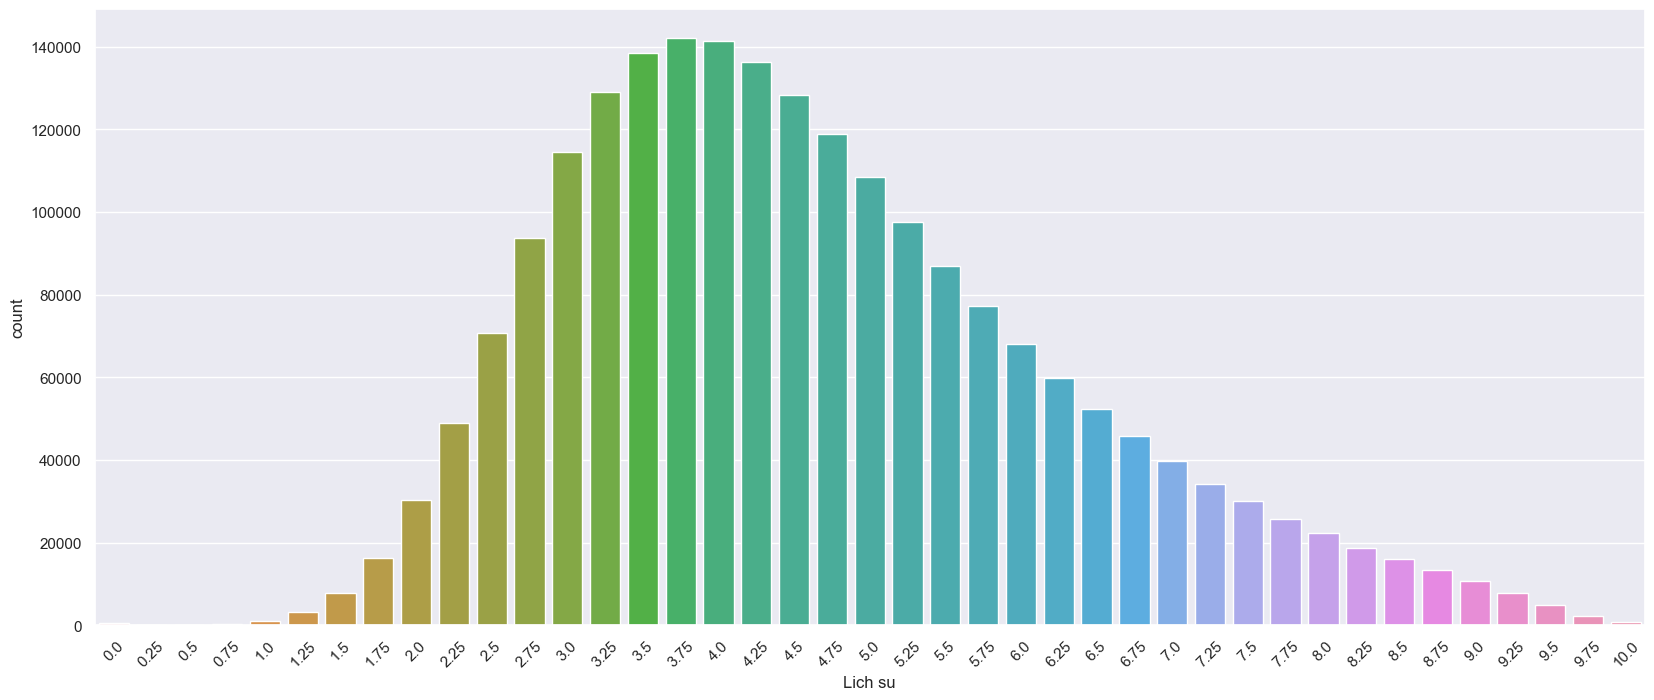

In [23]:
draw_chart(df_aspirants, 'Lich su')

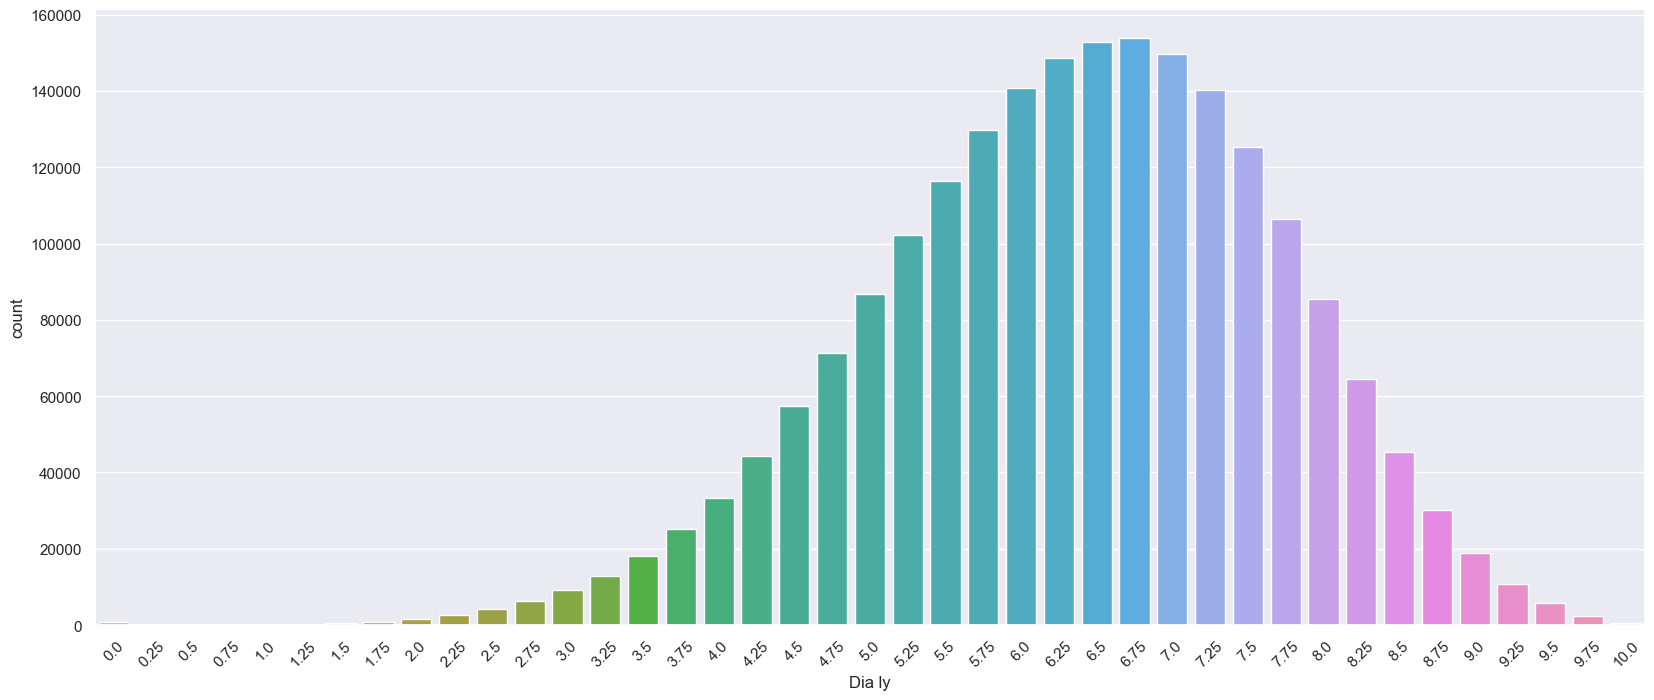

In [24]:
draw_chart(df_aspirants, 'Dia ly')

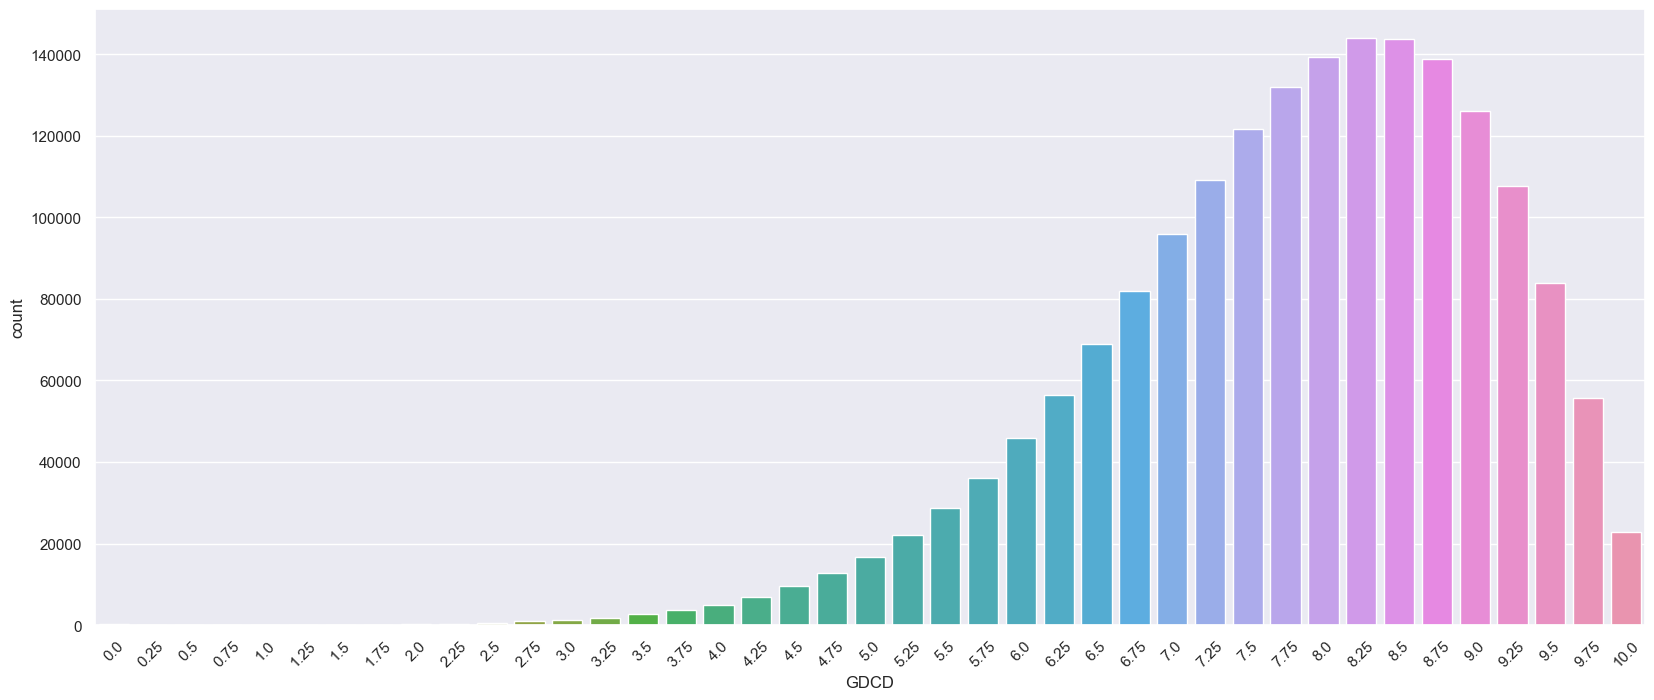

In [25]:
draw_chart(df_aspirants, 'GDCD')

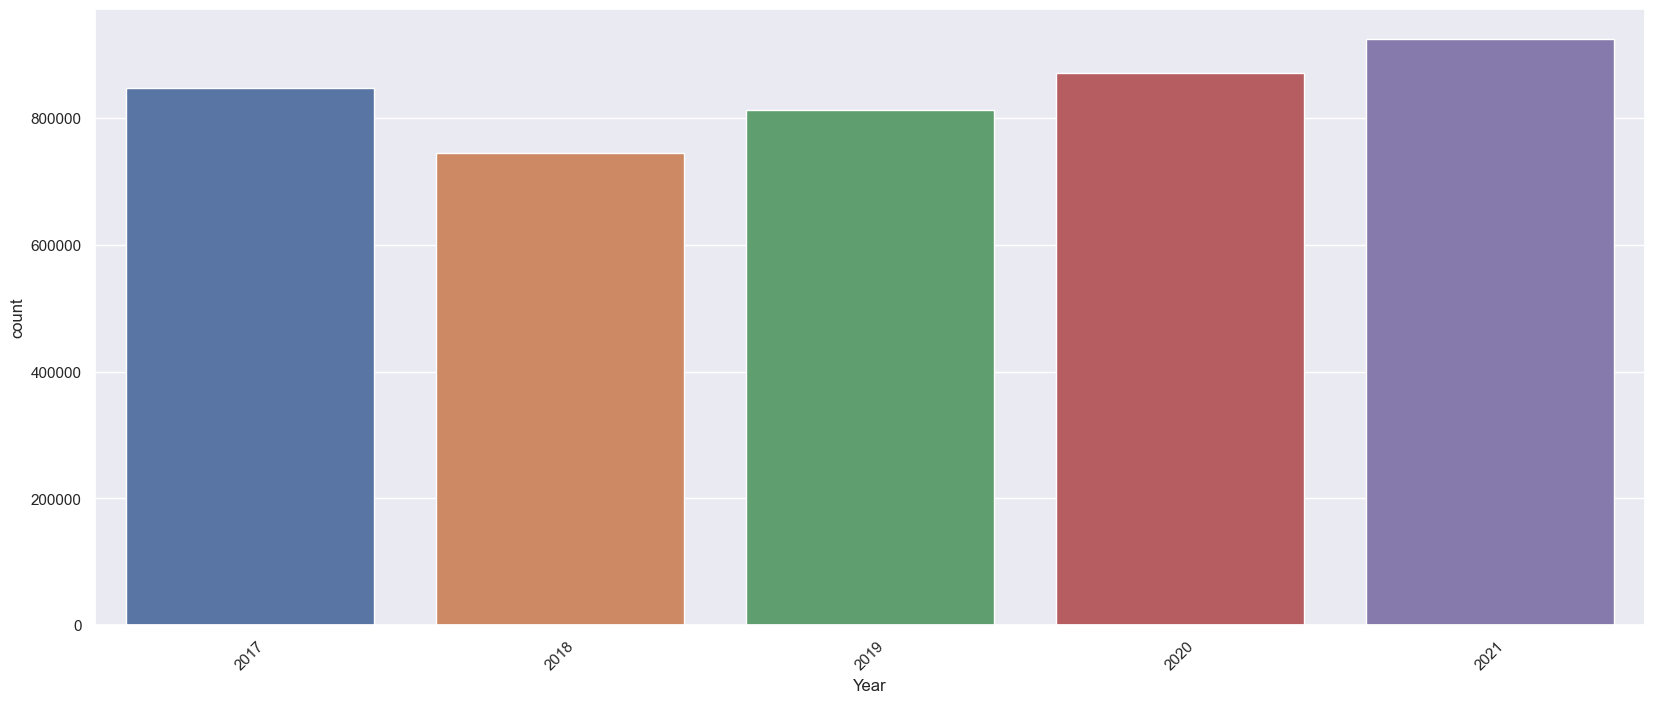

In [26]:
draw_chart(df_aspirants, 'Year')

Ta tiếp tục phần đặt câu hỏi